# Assignment List (100 marks)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Python Programming. (20 marks)
2. Linear Regression. (28 marks)
3. Classification. (52 marks)

<span style="color:red">**Deadline: 12:00 Noon, 15/01/2024**<span>

**Submit a rar/zip folder to Brightspace under the unit of Machine Learning for Media Production**

## Part 1. Python Programming (20 marks)

<span style="color:red">**Note: The code you design needs to be generalizable to all test samples.**<span>

### Question 1. Change Password (6 marks)
#### Given a string `password` and a positive integer `n`, could you design a script to move the first `n` characters of `password` to the end of the string in the same order as before? e.g.,
`Input: password="Bournemouth_University", n=6`

`Output: "mouth_UniversityBourne"`

In [339]:
password="Bournemouth_University" #This can be modified to any string you like
n=6                               #This can be modified to any integer you like

# <<<<<<<<<<<<<<< Fill in your code below this line >>>>>>>>>>>>>>>>>
temp = password[:n]
new_password = password[n:]
new_password += temp 

# <<<<<<<<<<<<<<<<<<<<<<<<< End of code >>>>>>>>>>>>>>>>>>>>>>>>>>>>>

print(new_password)

mouth_UniversityBourne


### Question 2. Daffodil Numbers (8 marks)
#### A daffodil number is a positive integer whose sum of the cubes in each bit equals itself. Could you design a script to output all the daffodils numbers in the range of [0, 1000). e.g.,

$$ 1^3 + 5^3 +3^3 = 153$$

In [340]:
daffodil_list = []
list = [x for x in range (1000)] # Initialize the list used to store daffodil numbers.

# <<<<<<<<<<<<<<< Fill in your code below this line >>>>>>>>>>>>>>>>>

def is_daffodil(num):
    sum = 0
    new = str(num)
    for  i in new:
        sum += int(i)**3
    if num == sum:
        return True
    else:
        return False

for itm in list:
    if is_daffodil(itm) == True:
        daffodil_list.append(itm)

# <<<<<<<<<<<<<<<<<<<<<<<<< End of code >>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        
print(daffodil_list)

[0, 1, 153, 370, 371, 407]


### Question 3. Maximum Perimeter of Triangles (6 marks)
#### Given an list of positive numbers (representing lengths), could you design a script to return the maximum perimeter of a triangle consisting of three of those lengths. If no triangles can be formed, return 0. 

<span style="color:red">**The condition that a triangle can be formed: the sum of any two edges of the triangle is greater than the third edge.</span>*

e.g.,

`Input: nums=[3,1,2,2,1]`
`Output: 7`

`Input: nums=[1,2,1,10]`
`Output: 0`

In [341]:
#nums=[1,2,1,10] #This can be modified to any length you like
nums=[2,3,2,2]

# <<<<<<<<<<<<<<< Fill in your code below this line >>>>>>>>>>>>>>>>>
def fun1(lst):
    lst.sort()
    m = len(lst)
    max_idx = m - 1

    if m < 3:
        return 0   
    
    for  max_idx in range(max_idx, 1 , -1):
        if lst[max_idx] < lst[max_idx-1] + lst[max_idx-2]:
            return (f"combination of {[lst[max_idx], lst[max_idx-1], lst[max_idx-2]]} will give us :  {lst[max_idx] + lst[max_idx-1] + lst[max_idx-2]}")

    return 0
# <<<<<<<<<<<<<<<<<<<<<<<<< End of code >>>>>>>>>>>>>>>>>>>>>>>>>>>>>

print(fun1(nums))

combination of [3, 2, 2] will give us :  7


## Part 2. Linear Regression (28 marks)

### Task 1. Split Dataset (6 marks)

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''from sklearn.model_selection import train_test_split #to split the data automaticly'''

data_df = pd.read_csv("Salary_dataset.csv") # Import the Salary dataset.
X = data_df["YearsExperience"].to_numpy()   # Separate data into features and labels
y = data_df["Salary"].to_numpy()

theta = np.array([1000.0,1000.0]) # Initialize the weights


X_0 = (np.ones(len(X)))     # Create a Numpy array X_0 with all elements of 1.
X = np.column_stack((X_0,X))         # Merge it with the original feature into a new feature.
print(f"shape of the X {X.shape}")                   # X should have the shape (30, 2) ------ (4 marks)

print(32*'--')
# Divide the dataset into training and test data in a ratio of 2:1 (2 marks)
border = (len(X)*2//3)
train_X, train_y = X[:border], y[:border]
test_X, test_y = X[border:], y[border:]
'''train_X,test_X, test_y,train_y = train_test_split(X,y,test_size=0.33) # automatic way to split the data'''

print(f"shape of :\ntrain_X: {train_X.shape}\ntrain_y: {train_y.shape}\ntest_X: {test_X.shape}\ntest_y: {test_y.shape}")


shape of the X (30, 2)
----------------------------------------------------------------
shape of :
train_X: (20, 2)
train_y: (20,)
test_X: (10, 2)
test_y: (10,)


### Task 2. Initialization and Plotting (6 marks)

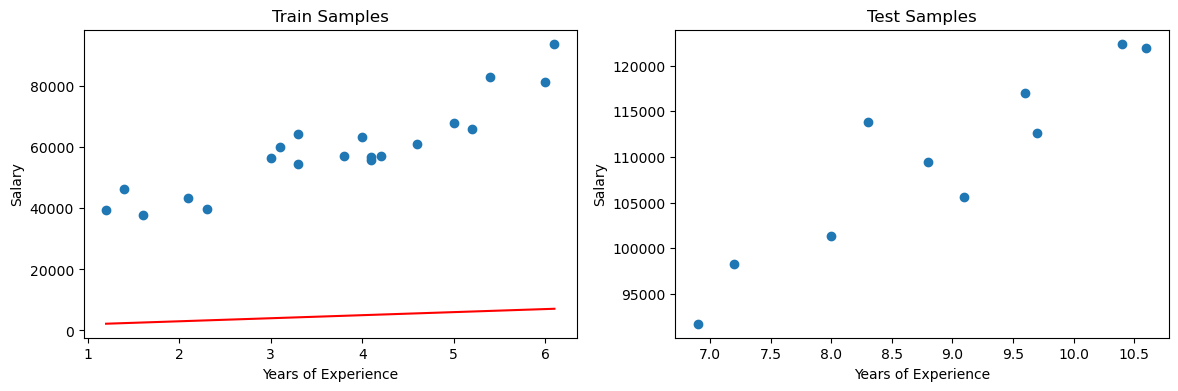

In [343]:
y_pred = train_X@theta    # Calculate y_pred based on training feature and weights (2 marks)

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X[:,1], train_y)        # Draw the training samples in the figure (1 mark)   
plt.plot(train_X[:,1], y_pred, c="red")  # Draw the initialized line in the figure (2 mark)


plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X[:,1], test_y)  # Draw the test samples in the figure (1 mark)

### Task 3. Gradient Descent (6 marks)

In [344]:
alpha= 0.001        # Initialize the learning rate        
train_loss_list=[]   # Initialize the train loss list  
test_loss_list=[]    # Initialize the test loss list   
epoch = 500

for iteration in range(epoch):
    
    y_pred = train_X@theta       # Calculate y_pred for each iteration (1 mark)
    train_loss = sum((y_pred-train_y)**2)   # Calculate the training loss for each iteration (1 mark)
    train_loss_list.append(train_loss)
    
    y_test_pred = test_X@theta  # Calculate y_test_pred for each iteration (1 mark)
    test_loss = sum((y_test_pred-test_y)**2)    # Calculate the test loss for each iteration (1 mark)
    test_loss_list.append(test_loss)

    theta -= (alpha*((y_pred-train_y)@train_X))     # Update the weights using Gradient Descent (2 marks)
    

### Task 4. Result Plotting (6 marks)

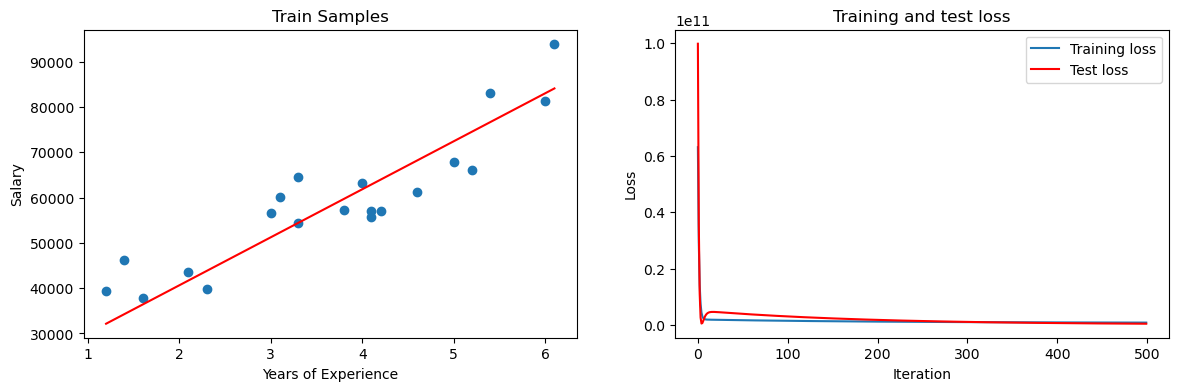

In [345]:
plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X[:,1], train_y)        # Draw the training samples in the figure (1 mark)
plt.plot(train_X[:,1], y_pred, c="red")  # Draw the optimalized line in the figure (1 mark)

plt.subplot(1,2,2)
plt.title("Training and test loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(train_loss_list)   # Draw the training loss curve in the figure (2 marks)
plt.plot(test_loss_list,c="r")  # Draw the test loss curve in the figure (2 marks)
plt.legend(["Training loss","Test loss"])
plt.show()

### Task 5. Result Analysis (4 marks)
#### What can you find from the plotted results above? Any improvements you think could be made to the above code?
from looking at the graphs we could understand that the linear regression could not create a Nobel nomination of the data, that's due to the result that we got because we have too many outliers and noise, for a better result we could change we can change the alpha value and iteration number, and the first thetas but it doesn't make much a difference because it will be changed with the gradient decent, another thing that we could notice is that it works for both train and test sets. the loss of both sets i near zero.


## Part 3. Classification (52 marks)

### Task 1. Dataset Split and Plotting (6 marks)

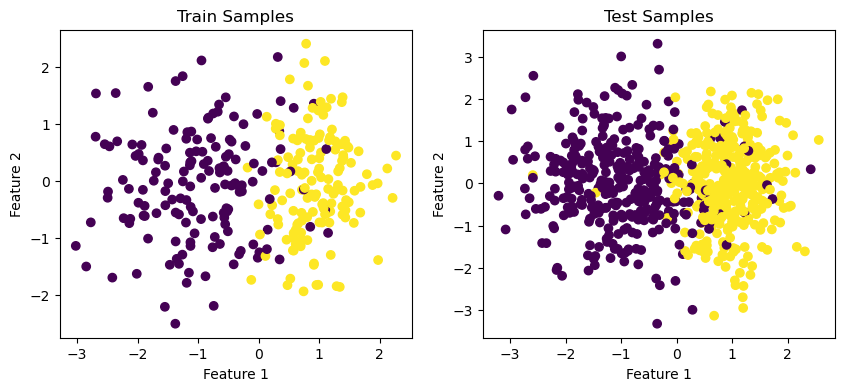

In [346]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

# Divide the dataset into training and test data in a ratio of 7:3 (2 marks)
border = (len(X)*3//10) #manual spliting the data
train_X, train_y = X[:border], y[:border]
test_X, test_y = X[border:], y[border:]
'''train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.30) # for automatic spliting using train_test_split'''

#Plot train and test samples
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(train_X[:,1], train_X[:,2], c=train_y) # Draw the training samples in the figure with color (2 marks)

plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(test_X[:,1], test_X[:,2], c=test_y) # Draw the test samples in the figure with color (2 marks)


### Task 2. Logistic Regression (14 marks)

In [347]:
alpha = 0.1            # Initialize the learning rate
epochs = 2500           # Initialize the epoch

In [348]:
theta = np.array([[1.0],    # Initialize the weights
                  [2.0],
                  [1.0]])

train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

train_loss_list_1 = []    # Initialize the training loss list
test_loss_list_1 = []     # Initialize the test loss list
train_acc_list_1 = []     # Initialize the training accuracy list
test_acc_list_1 = []      # Initialize the test accuracy list

def sigmoid(data, theta):
    return 1/(1+np.exp(-data@theta))

for epoch in range(epochs):
    # Calculate the Linear Summation & Sigmoid Function (4 marks)
    m = len(train_X)

    y_pred = sigmoid(train_X,theta)
    

    lg = np.log(y_pred)
    lg_2 = np.log(1-y_pred)
    
    # Calculate the training loss of each iteration (2 marks)
    train_loss = (-1/m)*(sum(train_y*lg+(1-train_y)*lg_2))
    train_loss_list_1.append(train_loss)


    # Calculate the training accuracy of each iteration (2 marks)
    train_pred_list=[]
    
    for i in y_pred:
        if(i >= 0.5):
            train_pred_list.append(1)
        else:
            train_pred_list.append(0)
    count=0
    for i in (np.array(train_pred_list)-train_y.reshape(-1)):
        if(i != 0):
            count+=1
    train_acc_list_1.append(1-(count/m))
    
    # Calculate the test loss of each iteration (2 marks)
    t_m = len(test_X)
    test_z = test_X@theta
    test_y_pred = (1/(1+np.exp(-test_z)))
    
    test_lg = np.log(test_y_pred)
    test_lg_2 = np.log(1-(test_y_pred))
    
    test_loss = (-1/t_m)*(sum(test_y*test_lg+(1-test_y)*test_lg_2))
    test_loss_list_1.append(test_loss)
    
    # Calculate the test accuracy of each iteration (2 marks)
    test_pred_list=[]
    for i in test_y_pred:
        if(i >= 0.5):
            test_pred_list.append(1)
        else:
            test_pred_list.append(0)
    count_t=0
    for i in (np.array(test_pred_list)-test_y.reshape(-1)):
        if(i != 0):
            count_t+=1
    test_acc_list_1.append(1-(count_t/t_m))
    
    # Update the weights using Gradient Descent (2 marks)
    theta -= ((alpha/m)*(train_X.T@(y_pred-train_y)))

### Task 3. Neural Network (20 marks)
<span style="color:red">**Here we use a neural network (MLP) with three nodes in the input layer, two nodes in the hidden layer and one node in the output layer, and Sigmoid function for the activation function.</span>*

In [349]:
theta_1 = np.array([[1.0,0.1],   # Initialize the weights
                    [1.0,0.1],
                    [1.0,0.1]])
theta_2 = np.array([[1.0],
                    [0.1]])

#train_y = train_y.reshape(-1,1)
#test_y = test_y.reshape(-1,1)

m = len(train_X)
t_m = len(test_X)

train_loss_list_2 = []      # Initialize the training loss list
test_loss_list_2 = []       # Initialize the test loss list
train_acc_list_2 = []       # Initialize the training accuracy list
test_acc_list_2 = []        # Initialize the test accuracy list

for epoch in range(epochs):
    # Forward Propagation (8 marks)
    h_1 = sigmoid(train_X,theta_1)
    h_2 = sigmoid(h_1,theta_2)
    
    lg = np.log(h_2)
    lg_2 = np.log(1-h_2)
    
    # Calculate the training loss of each iteration (2 marks)
    train_loss = ((-1/m)*(sum(train_y*lg+(1-train_y)*lg_2)))
    train_loss_list_2.append(train_loss)
    
    # Calculate the training accuracy of each iteration (2 marks)
    train_pred_list=[]
    for i in h_2:
        if(i >= 0.5):
            train_pred_list.append(1)
        else:
            train_pred_list.append(0)
    count=0
    for i in (np.array(train_pred_list)-train_y.reshape(-1)):
        if(i != 0):
            count+=1
    train_acc_list_2.append(1-(count/m))
    
    
    # Calculate the test loss of each iteration (2 marks)
    test_h_1 = sigmoid(test_X,theta_1)
    test_h_2 = sigmoid(test_h_1,theta_2)
    
    test_lg = np.log(test_h_2)
    test_lg_2 = np.log(1-test_h_2)
    
    test_loss = ((-1/t_m)*(sum(test_y*test_lg+(1-test_y)*test_lg_2)))
    train_loss = ((-1/m)*(sum(train_y*lg+(1-train_y)*lg_2)))
    test_loss_list_2.append(test_loss)
    
    # Calculate the test accuracy of each iteration (2 marks)
    test_pred_list=[]
    for i in test_h_2:
        if(i >= 0.5):
            test_pred_list.append(1)
        else:
            test_pred_list.append(0)
    test_count=0
    for i in (np.array(test_pred_list)-test_y.reshape(-1)):
        if(i !=0 ):
            test_count+=1
    test_acc_list_2.append(1-(test_count/t_m))
    
    # Backward Propagation (4 marks)
    theta_2 -= ((alpha/m)*(h_1.T @(h_2-train_y)))
    theta_1 -= ((alpha/m)*(train_X.T@(((h_2 - train_y)@theta_2.T)*h_1*(1-h_1))))
    


### Task 4. Result Plotting (8 marks)

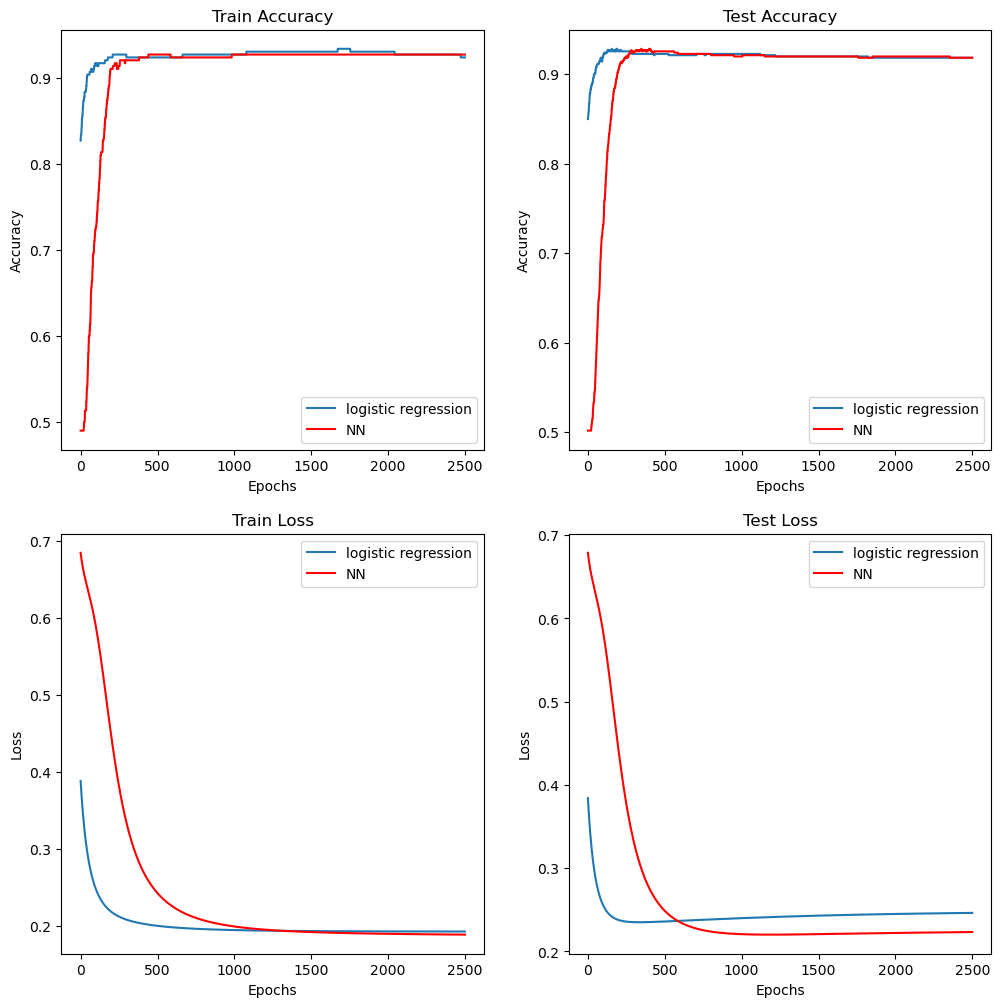

In [350]:
plt.figure(figsize=[12,12])

# Draw the training accuracy curve of the two classifiers in the figure (2 marks)
plt.subplot(2,2,1) 
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(train_acc_list_1)
plt.plot(train_acc_list_2,c="r")
plt.legend(["logistic regression","NN"])

# Draw the test accuracy curve of the two classifiers in the figure (2 marks)
plt.subplot(2,2,2) 
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(test_acc_list_1)
plt.plot(test_acc_list_2,c="r")
plt.legend(["logistic regression","NN"])

# Draw the training loss curve of the two classifiers in the figure (2 marks)
plt.subplot(2,2,3) 
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(train_loss_list_1)
plt.plot(train_loss_list_2,c="r")
plt.legend(["logistic regression","NN"])

# Draw the test loss curve of the two classifiers in the figure (2 marks)
plt.subplot(2,2,4) 
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(test_loss_list_1)
plt.plot(test_loss_list_2,c="r")
plt.legend(["logistic regression","NN"])

### Task 5. Principle Analysis (4 marks)
#### Could you explain the principles of Gradient Descent and Backward Propagation based on your understanding? 
firstly we will calculate the loss and cost function for our machine or NN then if we have a bif loss and cost function that means our thetas(weights) are not optimised so we will use gradient descent for that to improve our theta. We get better results at the end, but for neural networks, it's a bit different because we have hidden layers we use forward propagation to get the results. If we do not get the best results we need to do the back propagation, which means we go backwards from the last layer to the first layer each time we calculate, their fore we calculate the differentiation of each layer to get to the previous layer, basically we calculate the gradient descent for each layer based on the inputs it got from the previous layer to optimise the weights of that layer.